In [31]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

In [32]:
data = pd.read_csv("Input/creditcard.csv", thousands = ",")

In [33]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [34]:
dataset = data

In [35]:
def tsne_plot(X, y):
    tsne = TSNE(n_components=2)
    X_transformed = tsne.fit_transform(X)
    plt.figure(figsize=(12, 8))
    plt.scatter(
        X_transformed[np.where(y == 0), 0],
        X_transformed[np.where(y == 0), 1],
        marker='o',
        color='g',
        linewidth=1,
        alpha=0.8
    )
    plt.scatter(
        X_transformed[np.where(y == 1), 0],
        X_transformed[np.where(y == 1), 1],
        marker='o',
        color='r',
        linewidth=1,
        alpha=0.8
    )
    plt.show()

## С разделениям на часы

In [36]:
dataset_hour = dataset
dataset_hour['Time'] = dataset["Time"].apply(lambda x : x / 3600 % 24)

C:\Users\mrdmi\AppData\Local\Temp\ipykernel_14608\1498968587.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_subsample = anomaly_entries.append(regular_sample)


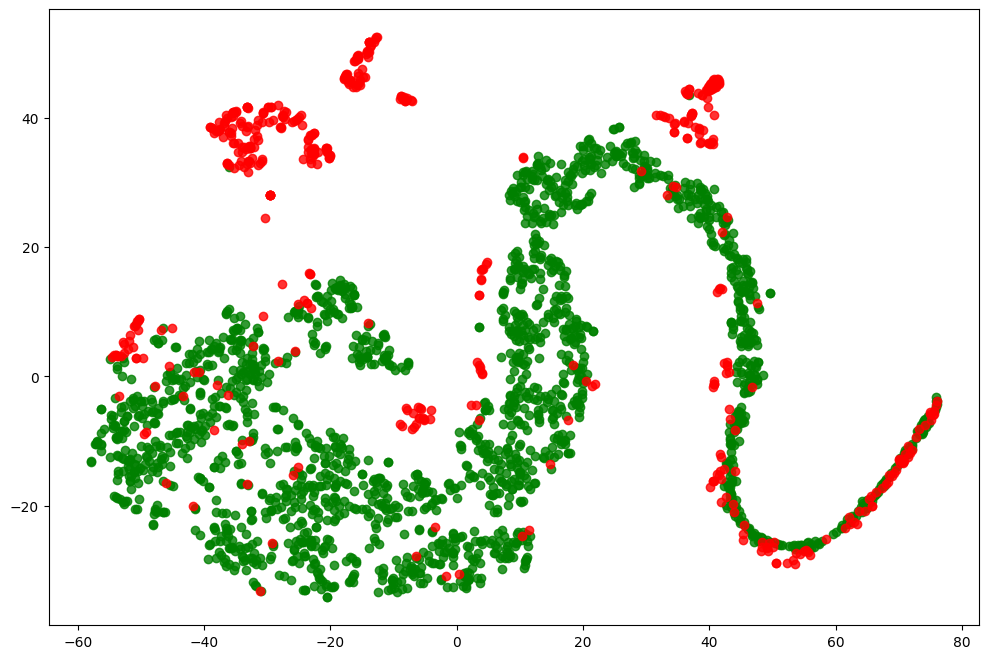

In [37]:
anomaly_entries = dataset_hour[dataset_hour['Class'] == 1]
regular_entries = dataset_hour[dataset_hour['Class'] == 0]
subsample_size = 2000
regular_sample = regular_entries.sample(n=subsample_size)
dataset_subsample = anomaly_entries.append(regular_sample)
X_subsample = dataset_subsample.drop(columns=['Class']).values
y_subsample = dataset_subsample['Class'].values
tsne_plot(X_subsample, y_subsample)

In [38]:
X = regular_entries.drop(columns="Class")

In [39]:
from tensorflow.keras import layers, losses, metrics, optimizers, regularizers
from tensorflow.keras.models import Model
input_layer = layers.Input(shape=(X.shape[1],))
encoded = layers.Dense(100, activation='tanh')(input_layer)
encoded = layers.Dense(50, activation='relu')(encoded)
encoded = layers.Dense(35, activation='relu')(encoded)
decoded = layers.Dense(50, activation='tanh')(encoded)
decoded = layers.Dense(100, activation='tanh')(decoded)
output_layer = layers.Dense(X.shape[1], activation='relu')(decoded)
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(
    optimizer='adadelta', loss='mse', metrics=['accuracy']
)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_6 (Dense)             (None, 100)               3100      
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 35)                1785      
                                                                 
 dense_9 (Dense)             (None, 50)                1800      
                                                                 
 dense_10 (Dense)            (None, 100)               5100      
                                                                 
 dense_11 (Dense)            (None, 30)                3030

In [40]:
autoencoder.fit(X, X,
                batch_size = 256, epochs = 10,
                shuffle = True, validation_split = 0.20)
 
 

Epoch 1/10
889/889 [==============================] - 3s 2ms/step - loss: 2373.5315 - accuracy: 0.2202 - val_loss: 2274.0564 - val_accuracy: 0.5128
Epoch 2/10
889/889 [==============================] - 1s 2ms/step - loss: 2371.9587 - accuracy: 0.3529 - val_loss: 2270.4834 - val_accuracy: 0.5165
Epoch 3/10
889/889 [==============================] - 1s 2ms/step - loss: 2357.0044 - accuracy: 0.4524 - val_loss: 2232.8567 - val_accuracy: 0.7410
Epoch 4/10
889/889 [==============================] - 1s 2ms/step - loss: 2311.7380 - accuracy: 0.6400 - val_loss: 2210.0916 - val_accuracy: 0.4834
Epoch 5/10
889/889 [==============================] - 1s 2ms/step - loss: 2293.9480 - accuracy: 0.6994 - val_loss: 2197.6050 - val_accuracy: 0.7882
Epoch 6/10
889/889 [==============================] - 1s 2ms/step - loss: 2282.4419 - accuracy: 0.8700 - val_loss: 2188.6804 - val_accuracy: 0.9029
Epoch 7/10
889/889 [==============================] - 1s 2ms/step - loss: 2273.7458 - accuracy: 0.9131 - val_los

In [41]:
y_all = dataset_hour['Class']
X_all = dataset_hour.drop(columns = 'Class')


In [42]:
from tensorflow.keras.models import Sequential
autoencoder_encode = Sequential()
autoencoder_encode.add(autoencoder.layers[0])
autoencoder_encode.add(autoencoder.layers[1])
autoencoder_encode.add(autoencoder.layers[2])
X_encoded = autoencoder_encode.predict(X_all)


8901/8901 [==============================] - 5s 522us/step


In [43]:
df = pd.DataFrame(X_encoded)

In [44]:
df['Class'] = y_all

C:\Users\mrdmi\AppData\Local\Temp\ipykernel_14608\2634859811.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_subsample = anomaly_entries.append(regular_sample)


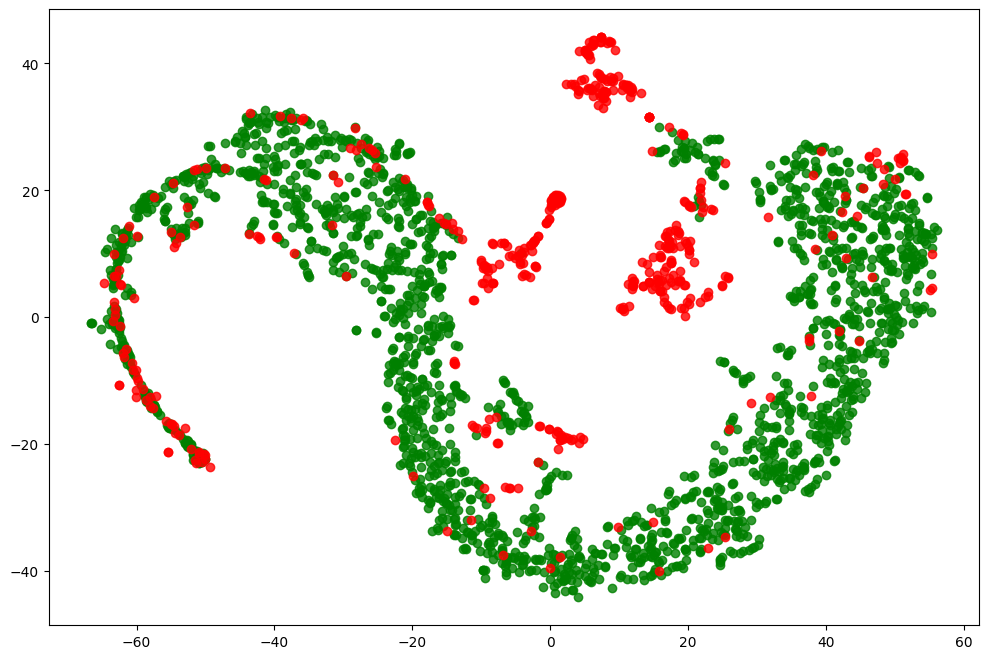

In [45]:
anomaly_entries = df[df['Class'] == 1]
regular_entries = df[df['Class'] == 0]
subsample_size = 2000
regular_sample = regular_entries.sample(n=subsample_size)
dataset_subsample = anomaly_entries.append(regular_sample)
X_subsample = dataset_subsample.drop(columns=['Class']).values
y_subsample = dataset_subsample['Class'].values
tsne_plot(X_subsample, y_subsample)

C:\Users\mrdmi\AppData\Local\Temp\ipykernel_14608\2634859811.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_subsample = anomaly_entries.append(regular_sample)


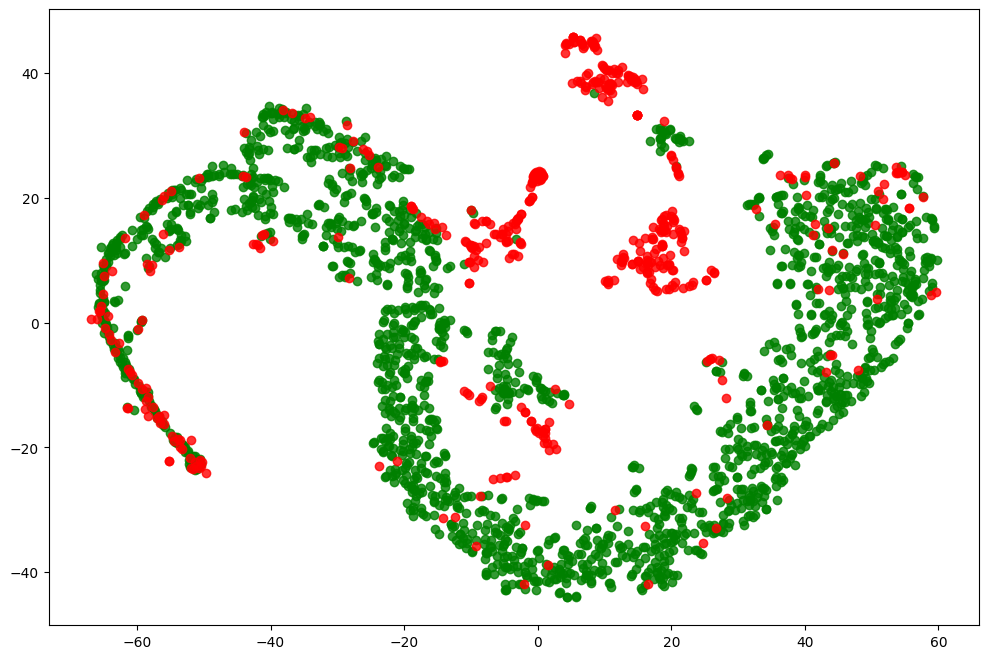

In [46]:
anomaly_entries = df[df['Class'] == 1]
regular_entries = df[df['Class'] == 0]
subsample_size = 2000
regular_sample = regular_entries.sample(n=subsample_size)
dataset_subsample = anomaly_entries.append(regular_sample)
X_subsample = dataset_subsample.drop(columns=['Class']).values
y_subsample = dataset_subsample['Class'].values
tsne_plot(X_subsample, y_subsample)

In [47]:
df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Class
0,0.037922,0.000000,0.0,3.111861,1.685984,0.013495,0.000000,0.000000,0.000000,0.0,...,0.0,3.389074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.155558,0
1,0.000000,0.000000,0.0,0.005525,0.815862,0.397332,0.000000,0.268812,0.000000,0.0,...,0.0,0.699825,0.554236,0.000000,0.302701,0.000000,0.000000,0.000000,0.335009,0
2,0.007006,0.000000,0.0,3.141265,1.712906,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,3.410660,0.000773,0.000000,0.000000,0.000000,0.000000,0.000000,1.153585,0
3,0.104186,0.000000,0.0,3.065454,1.654057,0.041147,0.000000,0.034001,0.000000,0.0,...,0.0,3.381181,0.000000,0.000000,0.000000,0.000000,0.010211,0.000000,1.122677,0
4,0.138404,0.000000,0.0,2.854501,1.545469,0.101923,0.000000,0.241386,0.000000,0.0,...,0.0,3.370829,0.000000,0.000000,0.000000,0.000000,0.129097,0.000000,1.186572,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.887679,0.831100,0.0,0.000000,0.110117,2.741434,1.739843,1.884389,1.451152,0.0,...,0.0,0.000000,0.762792,0.344295,0.631704,0.972462,2.836107,0.449324,0.477219,0
284803,0.136624,0.000000,0.0,0.033807,0.320830,1.752002,1.674106,0.920163,0.000000,0.0,...,0.0,0.000000,2.408672,0.000000,0.349941,1.298105,2.421570,0.000000,1.453462,0
284804,0.000000,0.000000,0.0,2.562587,1.508531,0.302965,0.743432,0.000000,0.000000,0.0,...,0.0,2.534239,0.386085,0.000000,0.051992,0.418273,0.718402,0.000000,0.566319,0
284805,1.118080,1.427088,0.0,0.000000,0.000000,1.742837,2.141015,1.462702,0.571439,0.0,...,0.0,0.000000,2.119258,0.000000,0.000000,2.805650,2.846502,0.000000,1.160904,0


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_all,
test_size=0.2, shuffle=True, stratify = y_all)

In [49]:
X_train.shape

(227845, 50)

In [50]:
X_test.shape

(56962, 50)

In [51]:
y_train.shape

(227845,)

In [52]:
y_test.shape

(56962,)

In [53]:
from sklearn.linear_model import LogisticRegression


In [54]:
clf = LogisticRegression(random_state=0, max_iter = 1000).fit(X_train, y_train)

In [55]:
predict = clf.predict(X_test)

In [56]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)

print(accuracy_score(y_test, predict))
print(precision_score(y_test, predict,  average='macro', zero_division=1))
print(recall_score(y_test, predict, average='weighted'))
print(f1_score (y_test, predict,  average='weighted'))

0.9989817773252344
0.9418508305962181
0.9989817773252344
0.9988258556873941


## Вторая часть

In [57]:
from sklearn.neighbors import LocalOutlierFactor

In [58]:
local_outlier_factor = LocalOutlierFactor(n_neighbors=20, leaf_size=30, metric='minkowski', p=2)

In [59]:
 y_lof = local_outlier_factor.fit_predict(X) == -1

In [60]:
print(accuracy_score(X, y_lof))
print(precision_score(X, y_lof,  average='macro', zero_division=1))
print(recall_score(X, y_lof, average='weighted'))
print(f1_score (X, y_lof,  average='weighted'))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets